# Session 3 
<table class="tfo-notebook-buttons" align="right" style="margin-top:-55px">
  <td>
      <a target="_blank" href="#"><img src="res/logo.png"  width="60" height="50" /><p style='margin-left:8px'>NECOP</p></a>
  </td>
  <td>
          <a target="_blank" href="#"> <img style="margin-top:18px" width="60" height="50" src="res/IST-LOGO.jpeg"><p style='margin-left:18px'>IST</p></a>
  </td>
 </table>

## From Python to Tensorflow
<table class="tfo-notebook-buttons" align="right" style="margin-top:-55px">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/api_docs/python/tf/all_symbols"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />TensorFlow</a>
  </td>
  <td>
          <a target="_blank" href="https://keras.io/guides/"> <img width="32" height="50" src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fadventuresinmachinelearning.com%2Fwp-content%2Fuploads%2F2017%2F05%2Fkeras-logo-small-wb-1.png&f=1&nofb=1">Keras Guide</a>
  </td>
 </table>

## Data representation 
tf.constant will create tensors wiht constant on the current device.

    tf.constant(
        value, dtype=None, shape=None, name='Const'
    )


In [9]:
# importing tensorflow
import tensorflow as tf
import numpy as np
R_Channel_offset = tf.constant(3, dtype=tf.int32)
print(R_Channel_offset)

grid = np.array([[1,0,0],[0,1,0],[0,0,1]])
grid_tensor = tf.constant(grid)
print(grid_tensor)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(
[[1 0 0]
 [0 1 0]
 [0 0 1]], shape=(3, 3), dtype=int64)


### Vaiables
tf.Variable creates a ensor wiht viable value so it can be chaged during session execution 

    tf.Variable(
    initial_value=None, trainable=None, validate_shape=True, caching_device=None,
    name=None, variable_def=None, dtype=None, import_scope=None, constraint=None,
    synchronization=tf.VariableSynchronization.AUTO,
    aggregation=tf.compat.v1.VariableAggregation.NONE, shape=None
    )


In [18]:
layer1_bias = tf.Variable(initial_value=0, dtype=tf.float64)
layer1_bias.assign(.001)
print(layer1_bias)
print(layer1_bias.value())

non_trainable = tf.Variable(.01, trainable=False)
print(non_trainable)
print(non_trainable.value())

<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.001>
tf.Tensor(0.001, shape=(), dtype=float64)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.01>
tf.Tensor(0.01, shape=(), dtype=float32)


### Place holders
place holders are used to feed values further into computation

    tf.raw_ops.Placeholder(
        dtype, shape=None, name=None
    )


## GradientTape
Gradient tape is ued to automatically compute differentials for operations which were performaed under it's scope

    tf.GradientTape(
    persistent=False, watch_accessed_variables=True
    )


In [31]:
offset = tf.constant(3.)
with tf.GradientTape(persistent=True) as tape:
    trainable = tf.Variable(1.)
    non_trainable = tf.Variable(2., trainable=False)
    x1 = trainable * 2.
    x1 = x1 + offset
    x2 = non_trainable * 3.
print(x1)    
print(tape.gradient(x1, trainable))

tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


## Data Loaders
### tfds
<code>tensorflow_datasets</code> (tfds) defines a collection of datasets ready-to-use with TensorFlow.
Each dataset is defined as a <code>tfds.core.DatasetBuilder</code>, which encapsulates the logic to download the dataset and construct an input pipeline, as well as contains the dataset documentation (version, splits, number of examples, etc.).

    The main library entrypoints are:
        tfds.builder: fetch a tfds.core.DatasetBuilder by name
        tfds.load: convenience method to construct a builder, download the data, and create an input pipeline, returning a tf.data.Dataset.

### Instaltion
    stable: pip install tensorflow-datasets
    BETA  : pip install tfds-nightly
    

### Find datasets
<code> tfds.list_builders() </code> returnes a list of all avaiable data builders under tfds

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
avaiable_builders = tfds.list_builders()
if 'cifar10' in avaiable_builders:
    print("cifar10 is now supported by tfds")
print(f'total number of dataset builders: {len(avaiable_builders)}')
print(f'list of all avaiable datasets is as following\n {avaiable_builders}')

cifar10 is now supported by tfds
total number of dataset builders: 1029
list of all avaiable datasets is as following
 ['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'asset', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'booksum', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d', 'cs_restaurants', 'curated_breast_imaging_ddsm'

limit_output extension: Maximum message size of 10000 exceeded with 24307 characters

### Load online dataset
<code> tfds.load </code> is one of the main entry point to load datasets it returnes <code>tf.data.Dataset</code>.

    tfds.load(
        name: str,
        *,
        split: Optional[Tree[splits_lib.Split]] = None,
        data_dir: Optional[str] = None,
        batch_size: tfds.typing.Dim = None,
        shuffle_files: bool = False,
        download: bool = True,
        as_supervised: bool = False,
        decoders: Optional[TreeDict[decode.Decoder]] = None,
        read_config: Optional[tfds.ReadConfig] = None,
        with_info: bool = False,
        builder_kwargs: Optional[Dict[str, Any]] = None,
        download_and_prepare_kwargs: Optional[Dict[str, Any]] = None,
        as_dataset_kwargs: Optional[Dict[str, Any]] = None,
        try_gcs: bool = False
    )


In [10]:
# data_set = tfds.load('mnist', split='train', shuffle_files=True)
#download: 162.17 MiB, generated: 132.40 MiB, total: 294.58 MiB
data_set = tfds.load('cifar10', split='train', shuffle_files=True)
print(data_set)

<_OptionsDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>


In [25]:
#get dataset entries 
batch_1 = data_set.batch(1).prefetch(1)
print(batch_1)
for item in batch_1:
    print(item)
    break

<PrefetchDataset shapes: {id: (None,), image: (None, 32, 32, 3), label: (None,)}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>
{'id': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'train_16399'], dtype=object)>, 'image': <tf.Tensor: shape=(1, 32, 32, 3), dtype=uint8, numpy=
array([[[[143,  96,  70],
         [141,  96,  72],
         [135,  93,  72],
         ...,
         [ 96,  37,  19],
         [105,  42,  18],
         [104,  38,  20]],

        [[128,  98,  92],
         [146, 118, 112],
         [170, 145, 138],
         ...,
         [108,  45,  26],
         [112,  44,  24],
         [112,  41,  22]],

        [[ 93,  69,  75],
         [118,  96, 101],
         [179, 160, 162],
         ...,
         [128,  68,  47],
         [125,  61,  42],
         [122,  59,  39]],

        ...,

        [[187, 150, 123],
         [184, 148, 123],
         [179, 142, 121],
         ...,
         [198, 163, 132],
         [201, 166, 135],
         [207, 174, 143]],

    

In [26]:
tfds.benchmark(data_set, batch_size=32)

  0%|          | 1/50000 [00:00<?, ?it/s]


************ Summary ************

Examples/sec (First included) 375240.08 ex/sec (total: 1600000 ex, 4.26 sec)
Examples/sec (First only) 1701.21 ex/sec (total: 32 ex, 0.02 sec)
Examples/sec (First excluded) 376895.23 ex/sec (total: 1599968 ex, 4.25 sec)


,duration,num_examples,avg
first+lasts,4.263937,1600000,375240.077664
first,0.018810,32,1701.210906
lasts,4.245127,1599968,376895.226134


2022-01-07 10:18:59.769213: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


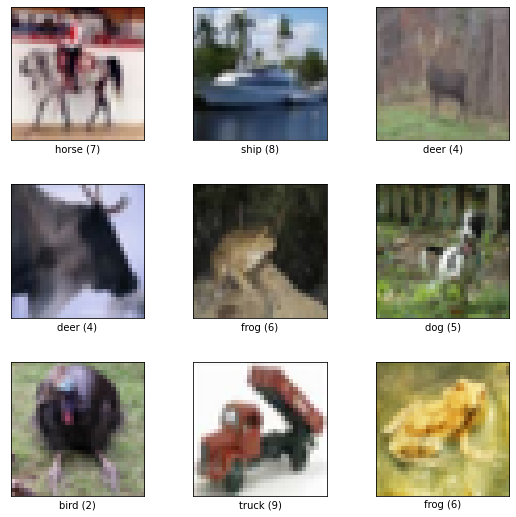

10
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
horse
1


In [38]:
from matplotlib import pyplot as plt
data_set, info = tfds.load('cifar10', split='train', shuffle_files=True, with_info=True)
#does not supports batched input or video 
figure = tfds.show_examples(data_set, info)

print(info.features["label"].num_classes)
print(info.features["label"].names)
print(info.features["label"].int2str(7))  # Human readable version (8 -> 'cat')
print(info.features["label"].str2int('automobile'))

# Advance Concepts


### Load Local Dataset
<code> keras.preprocessing.image.ImageDataGenerator</code>

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


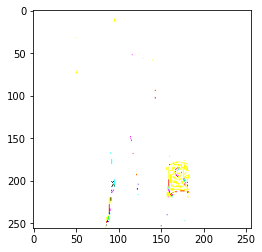

In [58]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
train_generator = datagen.flow_from_directory('res/dataset_dir/train/', class_mode='binary', batch_size=1)
test_generator = datagen.flow_from_directory('res/dataset_dir/test/', class_mode='binary', batch_size=1)
val_generator = datagen.flow_from_directory('res/dataset_dir/validation/', class_mode='binary', batch_size=1)
img, lable =train_generator.next()

In [52]:
#TODO create dataset csv file 
import pandas as pd
dataFrame = pd.read_csv('res/dataset_df/test.csv')
dataFrame.head()
datagen = ImageDataGenerator()
train_gen = datagen.flow_from_dataframe(
    dataframe=dataFrame, 
    directory='./res/dataset_df/', 
    x_col='path',
    y_col='label',

)

Found 0 validated image filenames belonging to 0 classes.


/home/fawadabbas/anaconda3/lib/python3.9/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 28 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


## Save and Close

In [ ]:
%%javascript
IPython.notebook.save_checkpoint();
window.onbeforeunload = null
window.close();
IPython.notebook.session.delete();